In [14]:
%matplotlib inline
import time
import numpy as np
import wave    # python built-in wave library
import librosa # 3rd party audio process library
import simpleaudio as sa # 3rd party playback library
import re
import numpy as np
import scipy
import matplotlib.pyplot as plt
import librosa.display
from scipy.signal import butter, lfilter, filtfilt

In [6]:
wave_path = '/home/alvin/cei/notebook_home/EyesInTheSky/pkg/tflab/heart_whisper/103_1305031931979_B.wav'

In [8]:
N_FRAME_TIME = 40
wave_obj = wave.open(wave_path, 'rb')
byte_string = wave_obj.readframes(wave_obj.getnframes()) # -1 also fine
n_channel = wave_obj.getnchannels()
bytes_per_sample = wave_obj.getsampwidth()
sample_rate = wave_obj.getframerate()
# convert byte string to numpy array
dtype = np.int16 if bytes_per_sample == 2 else np.int8
signal = np.fromstring(byte_string, dtype=dtype)
#frame_size = np.int16((config.N_FRAME_TIME / 1000) * sample_rate
frame_size = np.int16((N_FRAME_TIME / 1000) * sample_rate)

In [46]:
x = signal

In [47]:
nyq = 0.5 * sample_rate
order = 6
filter_string = '500-'
filter_list = filter_string.split(',')
for filter_item in filter_list:
    lowpass_flag = re.match('(\d+)\+$',filter_item)
    highpass_flag = re.match('(\d+)\-$',filter_item)
    bandstop_flag = re.match('(\d+)\-(\d+)$',filter_item)
    if lowpass_flag:
        #low pass filter
        print('low pass ==>')
        normal_cutoff = float(lowpass_flag.group(1)) / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        fx    = lfilter(b, a, x)
    if highpass_flag:
        print('high pass ==>')
        normal_cutoff = float(highpass_flag.group(1)) / nyq
        b, a = butter(order, normal_cutoff, btype='high', analog=False)                
        fx = filtfilt(b, a, x)

high pass ==>


In [48]:
fx.shape

(24839,)

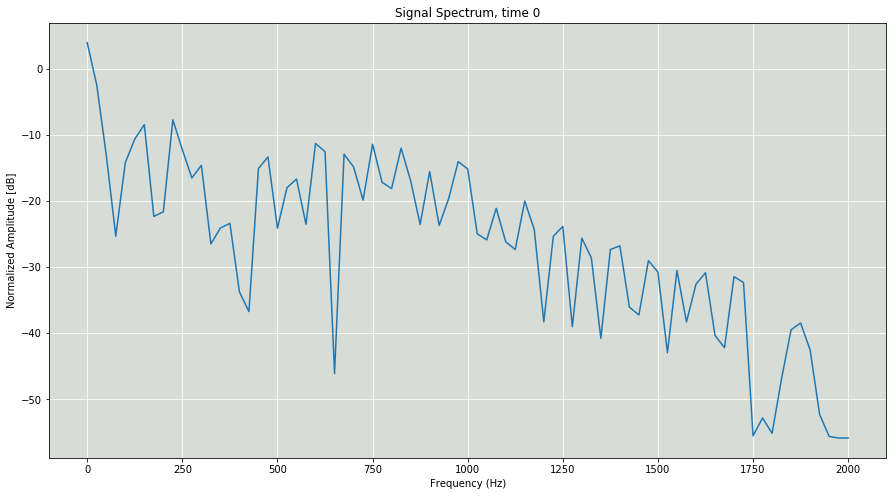

In [23]:
t = 0
fig,ax = plt.subplots(1,1,figsize=(15,8))
#visualize spectrum form at time t, frequency on the x axis, dB on the y axis '''
ax.clear()
x = signal
fs = sample_rate
x = x.astype(np.float32)
max = 2 ** (8 * bytes_per_sample - 1) # 32768
x /= max # scale to [-1, 1]
x = librosa.stft(x,n_fft=frame_size)
x = librosa.amplitude_to_db(x)
n_fft = 2 * (x.shape[0] - 1) # see API of librosa.stft
#x_axis = librosa.fft_frequencies(sr=fs, n_fft=1+n_fft)
x_axis = librosa.fft_frequencies(sr=fs, n_fft=frame_size)
ax.plot(x_axis, x[:, t])
# update plot info
ax.set_title('Signal Spectrum, time %d' % t)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Amplitude [dB]')
ax.set_fc('xkcd:light grey')
ax.grid(color='w')


In [40]:
n_fft

160

In [41]:
frame_size

160

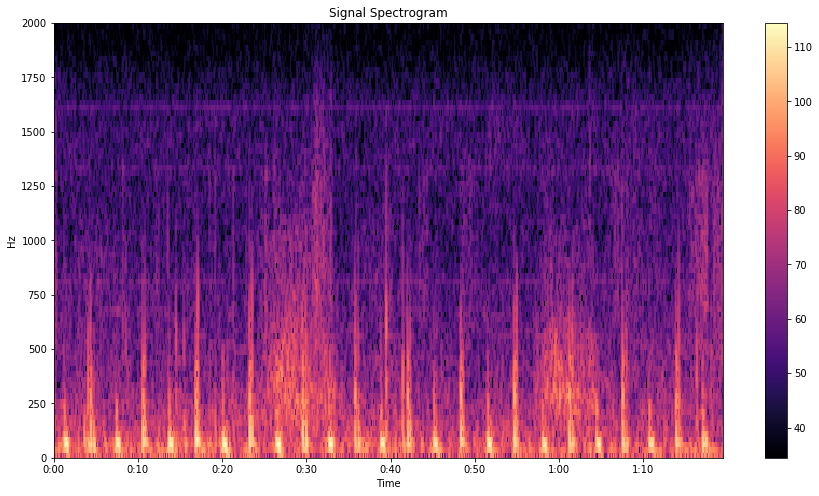

In [84]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
#visualize spectrum form at time t, frequency on the x axis, dB on the y axis '''
ax.clear()
x = signal
fs = sample_rate
x = x.astype(np.float32)
x = librosa.stft(x,n_fft=frame_size)
x = librosa.amplitude_to_db(x)
librosa.display.specshow(x, sr=fs, x_axis='time', y_axis='hz')
# update plot info
ax.set_title('Signal Spectrogram')
plt.colorbar()

In [85]:
x[70:81,12]

array([ 48.50408173,  44.69620132,  37.07504654,  34.43511963,
        39.2094841 ,  34.43511963,  36.05643463,  34.63001251,
        34.43511963,  34.43511963,  34.43511963], dtype=float32)

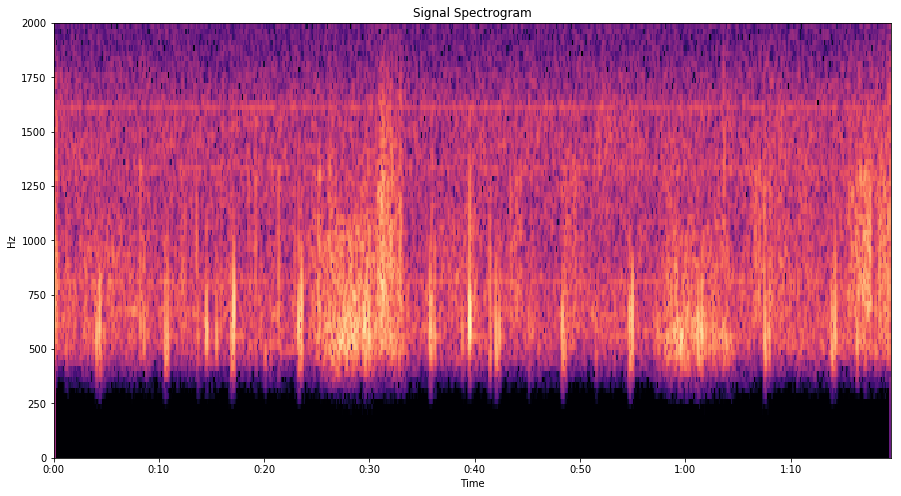

In [92]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
#visualize spectrum form at time t, frequency on the x axis, dB on the y axis '''
ax.clear()
gx = fx
fs = sample_rate
gx = gx.astype(np.float32)
   
g1x = librosa.stft(gx,n_fft=frame_size)
g2x = librosa.amplitude_to_db(g1x)
librosa.display.specshow(g2x[:,:], sr=fs, x_axis='time', y_axis='hz')
# update plot info
ax.set_title('Signal Spectrogram')

'g2x[2][1:10]

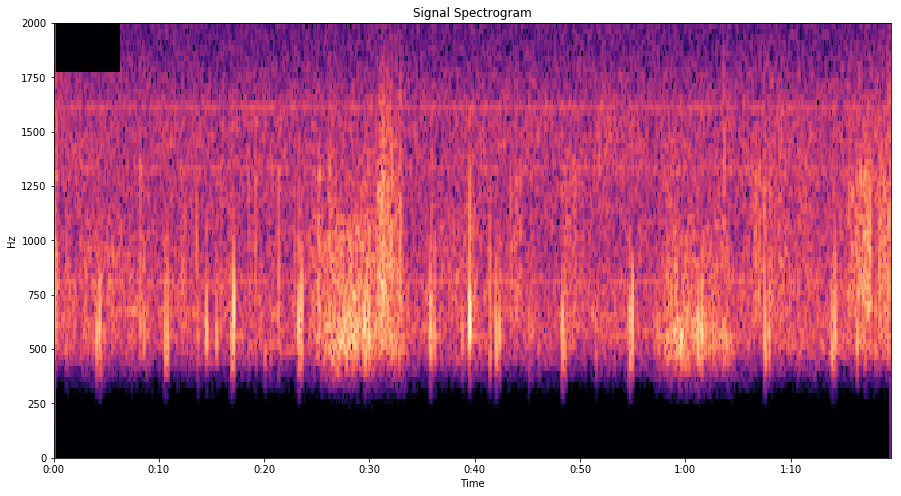

In [90]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
#visualize spectrum form at time t, frequency on the x axis, dB on the y axis '''
ax.clear()
gx = fx
fs = sample_rate
gx = gx.astype(np.float32)
    
g1x = librosa.stft(gx,n_fft=frame_size)
g2x = librosa.amplitude_to_db(g1x)
g2x[71:80,1:50] = g2x[1:10,1:50]
librosa.display.specshow(g2x[:,:], sr=fs, x_axis='time', y_axis='hz')
# update plot info
ax.set_title('Signal Spectrogram')